# Exploration of GPD File and Planimetrics
---

In [6]:
import fiona
import geopandas as gpd

In [3]:
plan = '/workspace/data/NYC_DoITT_Planimetric_OpenData.gdb/NYC_DoITT_Planimetric_OpenData.gdb/'

## Layer Extraction Exploration
---

In [4]:
fiona.listlayers(plan)

['PAVEMENT_EDGE',
 'HYDRO_STRUCTURE',
 'RETAININGWALL',
 'HYDROGRAPHY',
 'SIDEWALK',
 'PARK',
 'MEDIAN',
 'SWIMMING_POOL',
 'OPEN_SPACE_NO_PARK',
 'PARKING_LOT',
 'SHORELINE',
 'BOARDWALK',
 'RAILROAD',
 'TRANSPORT_STRUCTURE',
 'ELEVATION',
 'MISC_STRUCTURE_POLY',
 'CURB',
 'ROADBED',
 'PLAZA',
 'SIDEWALK_LINE',
 'RAILROAD_STRUCTURE']

In [7]:
pav_edge = gpd.read_file(plan, layer=0)

In [8]:
pav_edge.head()

,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,BLOCKFACEID,CONFLATED,SHAPE_Length,geometry
0,7.227000e+09,2270,227000,Unchanged,72270001,1,157.736184,MULTILINESTRING Z ((1049770.502 189031.341 28....
1,7.227000e+09,2270,227000,Unchanged,72270002,1,480.183817,MULTILINESTRING Z ((1053907.728 195497.923 53....
2,7.227000e+09,2270,227000,Unchanged,72270003,1,616.415933,MULTILINESTRING Z ((1057366.875 193608.238 54....
3,7.227000e+09,2270,227000,Unchanged,72270004,1,231.266128,MULTILINESTRING Z ((1053991.520 194435.270 58....
4,7.226000e+09,2260,226000,Unchanged,72260005,1,130.310825,MULTILINESTRING Z ((1052707.412 202627.498 81....


In [9]:
pav_edge_name =  gpd.read_file(plan, layer='PAVEMENT_EDGE')

In [10]:
pav_edge_name.head()

,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,BLOCKFACEID,CONFLATED,SHAPE_Length,geometry
0,7.227000e+09,2270,227000,Unchanged,72270001,1,157.736184,MULTILINESTRING Z ((1049770.502 189031.341 28....
1,7.227000e+09,2270,227000,Unchanged,72270002,1,480.183817,MULTILINESTRING Z ((1053907.728 195497.923 53....
2,7.227000e+09,2270,227000,Unchanged,72270003,1,616.415933,MULTILINESTRING Z ((1057366.875 193608.238 54....
3,7.227000e+09,2270,227000,Unchanged,72270004,1,231.266128,MULTILINESTRING Z ((1053991.520 194435.270 58....
4,7.226000e+09,2260,226000,Unchanged,72260005,1,130.310825,MULTILINESTRING Z ((1052707.412 202627.498 81....


**NOTE** We can access the data by layer number or layer name

<AxesSubplot: >

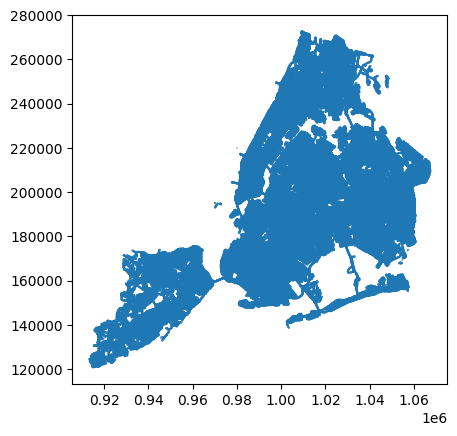

In [11]:
pav_edge.plot()

In [13]:
pav_edge.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
len(pav_edge)

178046

## Layer Data Exploration
---

In [15]:
layer_list = fiona.listlayers(plan)

In [19]:
plan_data_list = []

for layer_name in layer_list:
    plan_data_list.append(gpd.read_file(plan, layer=layer_name))

In [20]:
print(layer_list[0])
plan_data_list[0].head()

PAVEMENT_EDGE


,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,BLOCKFACEID,CONFLATED,SHAPE_Length,geometry
0,7.227000e+09,2270,227000,Unchanged,72270001,1,157.736184,MULTILINESTRING Z ((1049770.502 189031.341 28....
1,7.227000e+09,2270,227000,Unchanged,72270002,1,480.183817,MULTILINESTRING Z ((1053907.728 195497.923 53....
2,7.227000e+09,2270,227000,Unchanged,72270003,1,616.415933,MULTILINESTRING Z ((1057366.875 193608.238 54....
3,7.227000e+09,2270,227000,Unchanged,72270004,1,231.266128,MULTILINESTRING Z ((1053991.520 194435.270 58....
4,7.226000e+09,2260,226000,Unchanged,72260005,1,130.310825,MULTILINESTRING Z ((1052707.412 202627.498 81....


<AxesSubplot: >

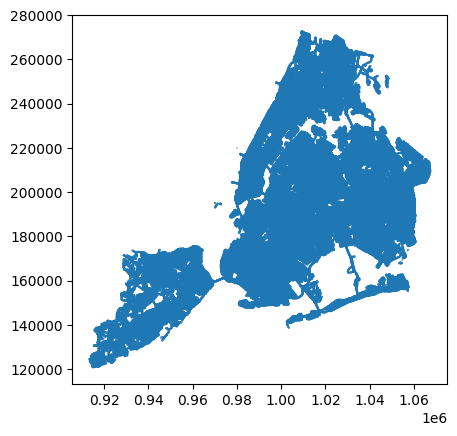

In [23]:
plan_data_list[0].plot()

In [21]:
print(layer_list[1])
plan_data_list[1].head()

HYDRO_STRUCTURE


,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,Elevation,STATUS,SHAPE_Length,SHAPE_Area,geometry
0,2.128000e+10,2800,280000,6.777530,Unchanged,243.337013,3403.620604,"MULTIPOLYGON (((989456.888 196375.081, 989454...."
1,2.128000e+10,2800,280000,5.000000,Unchanged,1420.050614,23099.793941,"MULTIPOLYGON (((989582.273 196437.317, 989574...."
2,2.128200e+10,2820,282000,5.104561,Unchanged,3297.960675,5103.713257,"MULTIPOLYGON (((988840.102 196358.511, 988840...."
3,2.128200e+10,2820,282000,6.986651,Updated,5169.561261,6903.051308,"MULTIPOLYGON (((990052.201 196478.086, 990045...."
4,2.128200e+10,2820,282000,6.638116,Unchanged,2767.939825,4334.512013,"MULTIPOLYGON (((985310.858 195530.502, 985371...."


<AxesSubplot: >

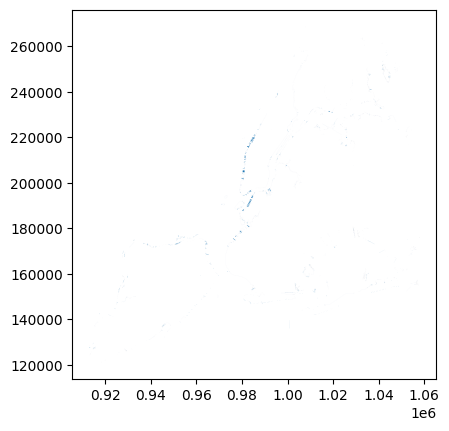

In [24]:
plan_data_list[1].plot()

In [22]:
print(layer_list[2])
plan_data_list[2].head()

RETAININGWALL


,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,SHAPE_Length,geometry
0,2.140000e+10,4000,400000,Unchanged,365.715400,MULTILINESTRING Z ((985530.573 194711.453 44.4...
1,2.140000e+10,4000,400000,Unchanged,226.155070,MULTILINESTRING Z ((985475.003 194408.890 68.2...
2,2.140000e+10,4000,400000,Unchanged,50.949832,MULTILINESTRING Z ((985523.914 194769.822 22.7...
3,2.140000e+10,4000,400000,Unchanged,175.276149,MULTILINESTRING Z ((987357.515 194593.661 68.9...
4,2.140000e+10,4000,400000,Unchanged,100.051403,MULTILINESTRING Z ((987949.170 194143.960 70.9...


<AxesSubplot: >

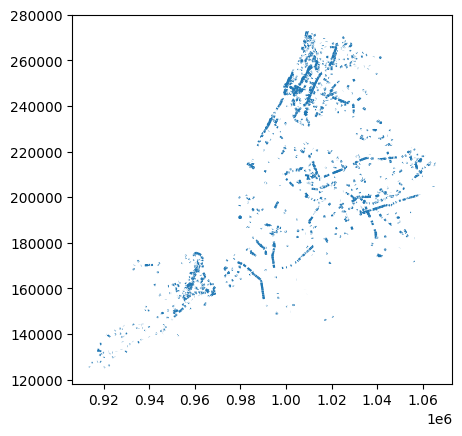

In [25]:
plan_data_list[2].plot()

In [26]:
print(layer_list[3])
plan_data_list[3].head()

HYDROGRAPHY


,NAME,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,SHAPE_Length,SHAPE_Area,geometry
0,None,2.126100e+10,2610,261000,Unchanged,284.939991,1.893027e+03,"MULTIPOLYGON (((985358.307 195199.994, 985356...."
1,None,2.126100e+10,2610,261000,Unchanged,255.632501,2.361146e+03,"MULTIPOLYGON (((985162.646 194741.685, 985155...."
2,EAST RIVER,2.126200e+10,2620,262000,Unchanged,482.569042,8.634500e+03,"MULTIPOLYGON (((985112.730 194774.258, 985113...."
3,EAST RIVER,2.126000e+10,2620,262000,Updated,101020.920576,7.736593e+07,"MULTIPOLYGON (((984408.882 192872.101, 984407...."
4,None,2.126100e+10,2610,261000,New,187.231412,1.668621e+03,"MULTIPOLYGON (((985260.594 194975.441, 985257...."


<AxesSubplot: >

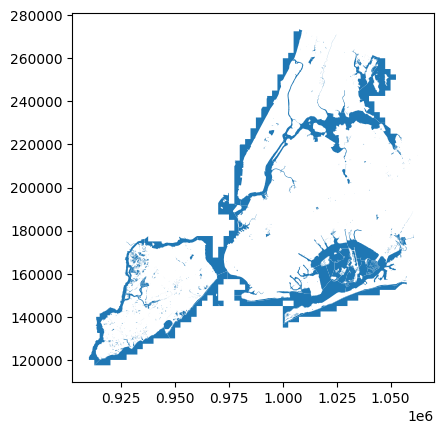

In [27]:
plan_data_list[3].plot()

In [28]:
print(layer_list[4])
plan_data_list[4].head()

SIDEWALK


,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,SHAPE_Length,SHAPE_Area,geometry
0,2.138000e+10,3800,380000,Unchanged,1763.887092,12252.910554,"MULTIPOLYGON (((984808.223 190837.194, 984802...."
1,2.138000e+10,3800,380000,Unchanged,1004.777693,5784.683784,"MULTIPOLYGON (((985043.926 190997.138, 985062...."
2,2.138000e+10,3800,380000,Unchanged,828.312364,2662.091456,"MULTIPOLYGON (((989755.070 195457.325, 989753...."
3,2.138000e+10,3800,380000,Updated,5063.776578,31976.407120,"MULTIPOLYGON (((989716.779 194185.507, 989795...."
4,2.138000e+10,3800,380000,Unchanged,2401.511502,11782.142620,"MULTIPOLYGON (((986247.745 190086.815, 986264...."


<AxesSubplot: >

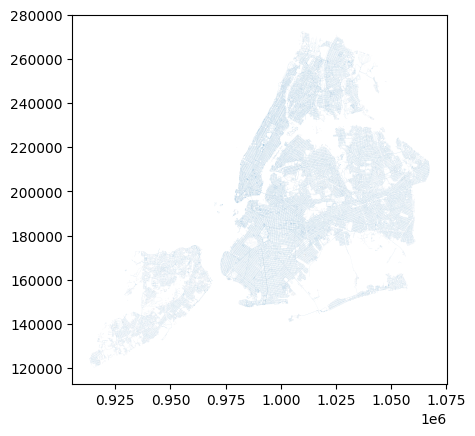

In [29]:
plan_data_list[4].plot()

In [30]:
print(layer_list[5])
plan_data_list[5].head()

PARK


,PARK_NAME,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,LANDUSE,PARKNUM,STATUS,SYSTEM,SHAPE_Length,SHAPE_Area,geometry
0,Commodore Barry Park,2.149100e+10,4910,491050,Community Park,B021,Updated,,829.420107,41539.801363,"MULTIPOLYGON (((990011.028 193576.923, 990003...."
1,Pierrepont Playground,2.149800e+10,4980,498000,Neighborhood Park,B222,Unchanged,,607.555193,21960.494920,"MULTIPOLYGON (((984993.079 192850.815, 984992...."
2,Cobble Hill Park,2.149800e+10,4980,498000,Neighborhood Park,B326,Unchanged,,784.421990,28079.076265,"MULTIPOLYGON (((985477.412 189907.616, 985477...."
3,Commodore Barry Park,2.149800e+10,4980,498000,Community Park,B021,Unchanged,,2672.710150,438416.114511,"MULTIPOLYGON (((990498.402 193034.421, 990499...."
4,Brooklyn Heights Promenade,2.149800e+10,4980,498000,Triangle/Plaza,B223DG,Unchanged,,1376.106398,14465.699799,"MULTIPOLYGON (((984952.331 193184.601, 984898...."


<AxesSubplot: >

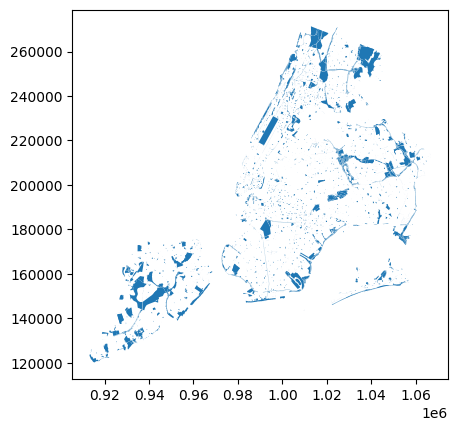

In [47]:
plan_data_list[5].plot()

In [31]:
print(layer_list[6])
plan_data_list[6].head()

MEDIAN


,STREET_NAME,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,SHAPE_Length,SHAPE_Area,geometry
0,None,2.136000e+10,3600,360010,Unchanged,2032.266689,9314.461680,"MULTIPOLYGON (((990026.147 191974.944, 990026...."
1,None,2.136000e+10,3600,360010,Unchanged,2012.702944,5028.823270,"MULTIPOLYGON (((989996.138 192081.658, 990000...."
2,None,2.136000e+10,3600,360010,Unchanged,1999.165426,4731.597582,"MULTIPOLYGON (((990000.000 191978.665, 990001...."
3,None,2.136000e+10,3600,360020,Unchanged,67.308714,185.567368,"MULTIPOLYGON (((990005.494 194189.986, 990000...."
4,None,2.136000e+10,3600,360020,Unchanged,61.224624,94.152175,"MULTIPOLYGON (((990007.746 194210.538, 990007...."


<AxesSubplot: >

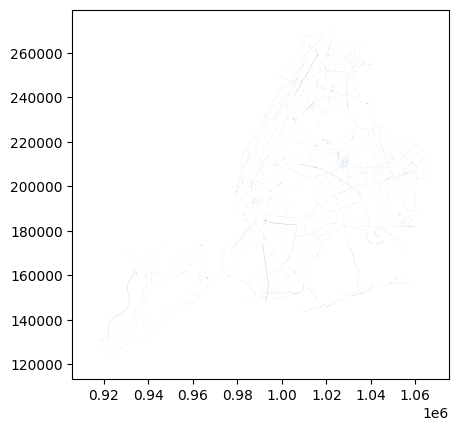

In [48]:
plan_data_list[6].plot()

In [32]:
print(layer_list[7])
plan_data_list[7].head()

SWIMMING_POOL


,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,SHAPE_Length,SHAPE_Area,geometry
0,2.145000e+10,4500,450000,New,94.721473,491.610137,"MULTIPOLYGON (((985747.116 190951.935, 985735...."
1,2.145000e+10,4500,450000,New,175.963653,1838.916986,"MULTIPOLYGON (((985178.095 194238.208, 985166...."
2,1.450000e+09,4500,450000,Unchanged,506.682050,8527.975331,"MULTIPOLYGON (((1003341.103 140274.216, 100335..."
3,1.450000e+09,4500,450000,Unchanged,119.085149,861.130087,"MULTIPOLYGON (((1003300.078 140273.814, 100329..."
4,1.450000e+09,4500,450000,Unchanged,323.443698,5058.278404,"MULTIPOLYGON (((1011426.219 142336.194, 101141..."


<AxesSubplot: >

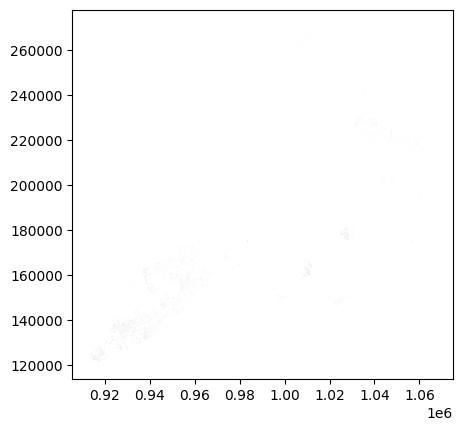

In [49]:
plan_data_list[7].plot()

In [33]:
print(layer_list[8])
plan_data_list[8].head()

OPEN_SPACE_NO_PARK


,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,NAME,STATUS,Shape_Length,Shape_Area,geometry
0,2.125000e+10,2510,251000,None,Updated,1354.218474,108008.033659,"MULTIPOLYGON (((990000.000 191316.796, 990000...."
1,2.125100e+10,2510,251000,None,Unchanged,364.398372,6794.971083,"MULTIPOLYGON (((990035.147 192624.029, 990053...."
2,2.125100e+10,2510,251000,None,Updated,1069.161002,29119.787118,"MULTIPOLYGON (((989440.041 195091.631, 989438...."
3,2.125000e+10,2510,251000,None,Updated,376.668424,4630.103413,"MULTIPOLYGON (((989505.538 194830.175, 989468...."
4,2.125100e+10,2510,251000,None,Updated,210.425338,2017.613736,"MULTIPOLYGON (((989393.376 192444.716, 989393...."


<AxesSubplot: >

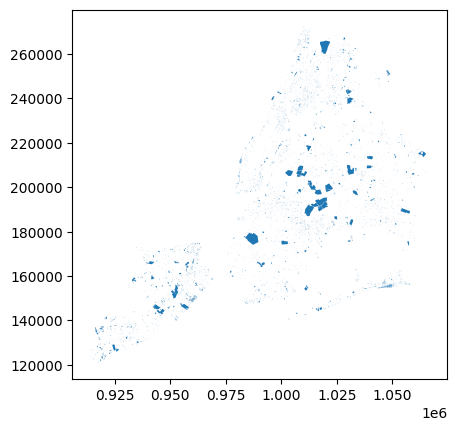

In [50]:
plan_data_list[8].plot()

In [34]:
print(layer_list[9])
plan_data_list[9].head()

PARKING_LOT


,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,SHAPE_Length,SHAPE_Area,geometry
0,2.150000e+10,5000,500000,Unchanged,778.318836,32676.073685,"MULTIPOLYGON (((990044.443 190843.596, 990045...."
1,2.150000e+10,5000,500000,Updated,3737.772791,108080.622252,"MULTIPOLYGON (((989953.214 191814.468, 989950...."
2,2.150000e+10,5000,500000,Unchanged,442.772495,5407.860486,"MULTIPOLYGON (((988897.051 195330.555, 988893...."
3,2.150000e+10,5000,500000,Unchanged,284.623893,4027.729151,"MULTIPOLYGON (((989270.884 195436.546, 989269...."
4,2.150000e+10,5000,500000,Unchanged,1567.687419,122903.007235,"MULTIPOLYGON (((988145.689 195152.534, 988145...."


<AxesSubplot: >

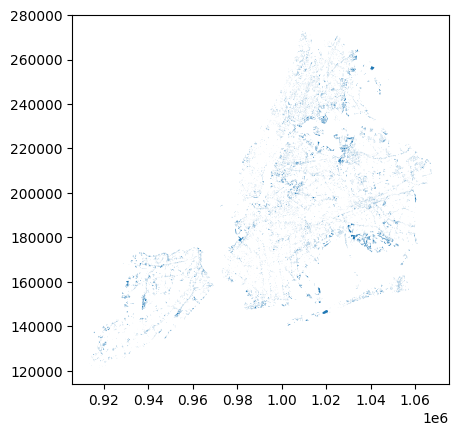

In [51]:
plan_data_list[9].plot()

In [35]:
print(layer_list[10])
plan_data_list[10].head()

SHORELINE


,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,SHAPE_Length,geometry
0,2.139000e+10,3900,390000,Unchanged,482.569042,"MULTILINESTRING ((985000.000 194733.449, 98499..."
1,2.139000e+10,3900,390000,Updated,133815.757431,"MULTILINESTRING ((997974.251 218587.755, 99795..."
2,2.139000e+10,3900,390000,Unchanged,77262.246784,"MULTILINESTRING ((985937.913 185545.239, 98598..."
3,1.390000e+09,3900,390000,Unchanged,805.165413,"MULTILINESTRING ((1050147.090 164096.960, 1050..."
4,1.390000e+09,3900,390000,Updated,984.992664,"MULTILINESTRING ((1030507.575 154166.126, 1030..."


<AxesSubplot: >

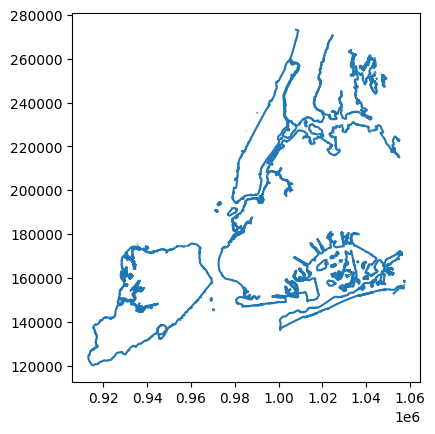

In [52]:
plan_data_list[10].plot()

In [36]:
print(layer_list[11])
plan_data_list[11].head()

BOARDWALK


,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,SHAPE_Length,SHAPE_Area,geometry
0,2.143000e+10,4300,430000,Updated,3098.444507,51216.063521,"MULTIPOLYGON (((985724.101 195522.754, 985700...."
1,2.143000e+10,4300,430000,Unchanged,937.323293,14518.704618,"MULTIPOLYGON (((983960.279 196835.336, 983919...."
2,2.143000e+10,4300,430000,Updated,1047.831759,9739.650230,"MULTIPOLYGON (((986433.376 195903.939, 986423...."
3,1.430000e+09,4300,430000,Updated,18112.527908,78131.519402,"MULTIPOLYGON (((1006005.709 141610.543, 100596..."
4,1.430000e+09,4300,430000,Unchanged,176.410436,585.091853,"MULTIPOLYGON (((1051018.409 155128.049, 105101..."


<AxesSubplot: >

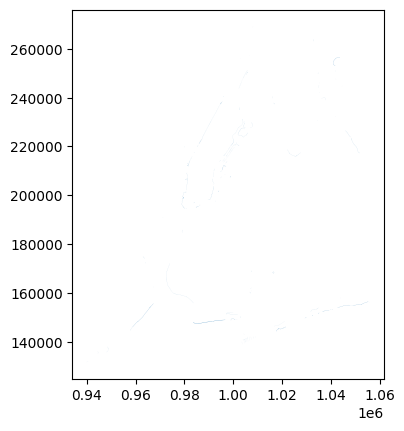

In [53]:
plan_data_list[11].plot()

In [37]:
print(layer_list[12])
plan_data_list[12].head()

RAILROAD


,NAME,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,SHAPE_Length,geometry
0,BMT A,2.124000e+10,2400,240010,Unchanged,267.815443,MULTILINESTRING Z ((986539.045 197787.144 130....
1,BMT A,2.124000e+10,2400,240010,Unchanged,21.600645,MULTILINESTRING Z ((986644.559 197540.993 137....
2,IND B,2.124000e+10,2400,240010,Unchanged,2159.161426,MULTILINESTRING Z ((985707.021 199779.453 61.9...
3,BMT A,2.124000e+10,2400,240010,Unchanged,271.949169,MULTILINESTRING Z ((986627.279 197533.463 137....
4,IND B,2.124000e+10,2400,240010,Unchanged,2156.914512,MULTILINESTRING Z ((986521.033 197783.798 129....


<AxesSubplot: >

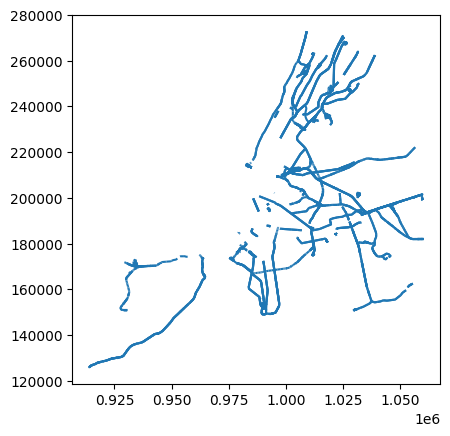

In [54]:
plan_data_list[12].plot()

In [38]:
print(layer_list[13])
plan_data_list[13].head()

TRANSPORT_STRUCTURE


,NAME,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,SHAPE_Length,SHAPE_Area,geometry
0,Manhatten Bridge,2.123000e+10,2300,230000,Unchanged,13869.458100,762174.644461,MULTIPOLYGON Z (((985711.962 199792.396 66.631...
1,None,2.123300e+10,2330,233000,Unchanged,3780.022390,52710.833435,MULTIPOLYGON Z (((985400.536 194238.887 61.660...
2,None,2.123000e+10,2300,230000,Unchanged,5932.110184,118944.161933,MULTIPOLYGON Z (((984475.052 191777.236 53.745...
3,None,2.123000e+10,2300,230000,Unchanged,5727.650851,102510.665758,MULTIPOLYGON Z (((984412.295 191776.928 40.353...
4,None,2.123000e+10,2300,230000,Unchanged,9935.860772,462752.088665,"MULTIPOLYGON Z (((991360.925 192937.706 0.000,..."


<AxesSubplot: >

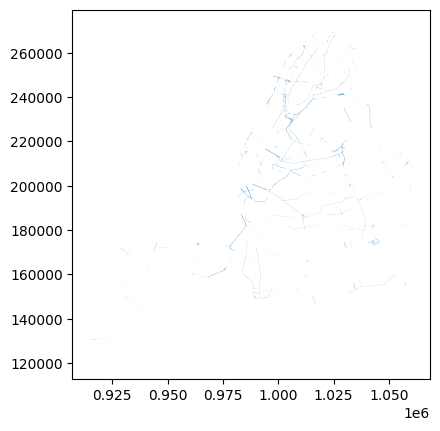

In [55]:
plan_data_list[13].plot()

In [39]:
print(layer_list[14])
plan_data_list[14].head()

ELEVATION


,ELEVATION,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,geometry
0,129.740000,2.130200e+10,3020,302000,Unchanged,POINT Z (989083.000 195003.260 129.740)
1,120.586263,2.130000e+10,3000,300020,Unchanged,POINT Z (987638.301 195007.228 120.586)
2,114.740000,2.130200e+10,3020,302000,Unchanged,POINT Z (988565.410 195011.600 114.740)
3,69.130000,2.130200e+10,3020,302000,Unchanged,POINT Z (989509.570 195013.270 69.130)
4,49.235397,2.130200e+10,3020,302000,Unchanged,POINT Z (987570.796 195019.969 49.235)


In [ ]:
plan_data_list[14].plot()

In [41]:
print(layer_list[15])
plan_data_list[15].head()

MISC_STRUCTURE_POLY


,DESCRIPTION,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,SHAPE_Length,SHAPE_Area,geometry
0,Large_Billboard_and_Sign,2.141000e+10,4100,410000,Unchanged,146.437729,150.872339,"MULTIPOLYGON (((989264.435 190772.368, 989258...."
1,Large_Billboard_and_Sign,2.141000e+10,4100,410000,Unchanged,68.797474,48.418179,"MULTIPOLYGON (((989235.839 190841.538, 989204...."
2,Large_Billboard_and_Sign,2.141000e+10,4100,410000,Unchanged,70.967425,52.570061,"MULTIPOLYGON (((989235.206 190848.887, 989203...."
3,Large_Billboard_and_Sign,2.141000e+10,4100,410000,Unchanged,160.850846,160.142659,"MULTIPOLYGON (((989210.526 190929.503, 989209...."
4,Large_Billboard_and_Sign,2.141000e+10,4100,410000,Unchanged,103.255861,145.892368,"MULTIPOLYGON (((988976.025 191485.013, 988964...."


<AxesSubplot: >

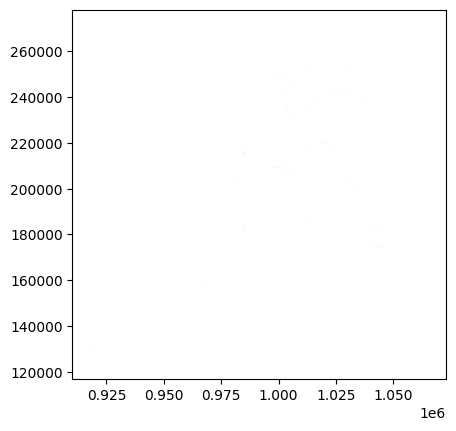

In [57]:
plan_data_list[15].plot()

In [42]:
print(layer_list[16])
plan_data_list[16].head()

CURB


,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,SHAPE_Length,geometry
0,2.122500e+10,2250,225000,Unchanged,10.796366,MULTILINESTRING Z ((982463.042 198366.821 35.1...
1,2.122500e+10,2250,225000,Unchanged,168.613231,MULTILINESTRING Z ((980738.511 196145.457 13.8...
2,2.122500e+10,2250,225000,Unchanged,234.036023,MULTILINESTRING Z ((981289.009 195663.979 7.93...
3,2.122500e+10,2250,225000,Unchanged,74.602330,MULTILINESTRING Z ((986608.535 193203.557 82.7...
4,2.122500e+10,2250,225000,Unchanged,233.061789,MULTILINESTRING Z ((984627.434 198658.976 14.4...


<AxesSubplot: >

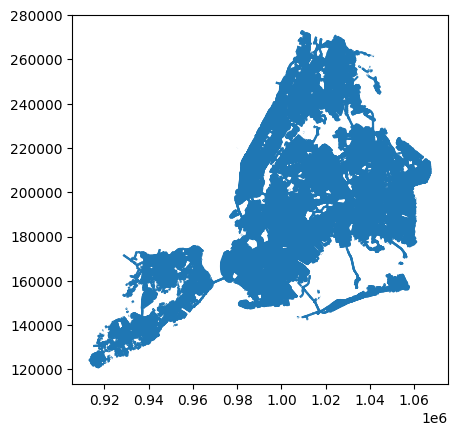

In [58]:
plan_data_list[16].plot()

In [43]:
print(layer_list[17])
plan_data_list[17].head()

ROADBED


,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,SHAPE_Length,SHAPE_Area,geometry
0,7.350000e+09,3500,350000,Unchanged,1309.508898,17622.102659,"MULTIPOLYGON (((1054753.704 184979.272, 105475..."
1,7.350000e+09,3500,350000,Unchanged,1327.784561,17841.044870,"MULTIPOLYGON (((1054988.025 184869.348, 105498..."
2,7.350000e+09,3500,350000,Unchanged,1351.065313,17521.007784,"MULTIPOLYGON (((1055969.734 185101.106, 105598..."
3,7.350000e+09,3500,350000,Unchanged,1232.404184,16233.059225,"MULTIPOLYGON (((1057422.829 185110.430, 105745..."
4,7.350000e+09,3500,350010,Unchanged,198.431125,2432.017445,"MULTIPOLYGON (((1056244.551 184981.074, 105624..."


<AxesSubplot: >

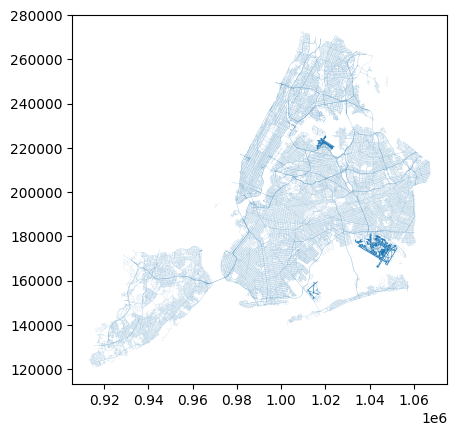

In [59]:
plan_data_list[17].plot()

In [44]:
print(layer_list[18])
plan_data_list[18].head()

PLAZA


,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,SHAPE_Length,SHAPE_Area,geometry
0,2.160000e+10,6000,600000,Unchanged,696.903595,17651.594728,"MULTIPOLYGON (((987977.425 194142.180, 987999...."
1,2.160000e+10,6000,600000,Unchanged,605.132211,9520.583391,"MULTIPOLYGON (((987178.644 191209.666, 987157...."
2,2.160000e+10,6000,600000,Unchanged,331.582957,2206.584278,"MULTIPOLYGON (((985434.321 194079.311, 985472...."
3,2.160000e+10,6000,600000,Unchanged,396.476446,3867.362455,"MULTIPOLYGON (((986601.815 193131.377, 986605...."
4,2.160000e+10,6000,600000,Unchanged,389.050999,4838.305211,"MULTIPOLYGON (((986704.424 194297.150, 986703...."


<AxesSubplot: >

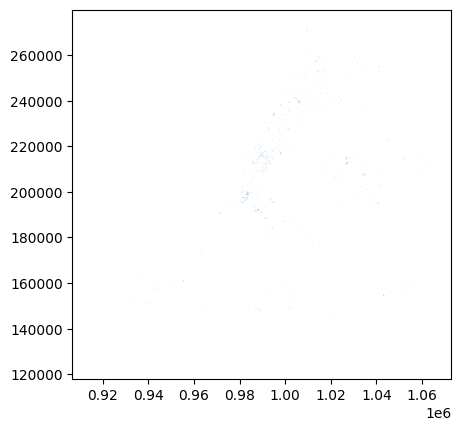

In [60]:
plan_data_list[18].plot()

In [45]:
print(layer_list[19])
plan_data_list[14].head()

SIDEWALK_LINE


,ELEVATION,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,geometry
0,129.740000,2.130200e+10,3020,302000,Unchanged,POINT Z (989083.000 195003.260 129.740)
1,120.586263,2.130000e+10,3000,300020,Unchanged,POINT Z (987638.301 195007.228 120.586)
2,114.740000,2.130200e+10,3020,302000,Unchanged,POINT Z (988565.410 195011.600 114.740)
3,69.130000,2.130200e+10,3020,302000,Unchanged,POINT Z (989509.570 195013.270 69.130)
4,49.235397,2.130200e+10,3020,302000,Unchanged,POINT Z (987570.796 195019.969 49.235)


<AxesSubplot: >

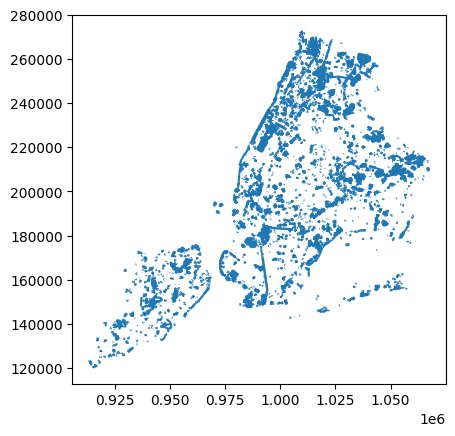

In [61]:
plan_data_list[19].plot()

In [46]:
print(layer_list[20])
plan_data_list[20].head()

RAILROAD_STRUCTURE


,NAME,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,Shape_Length,Shape_Area,geometry
0,None,2.124800e+10,2480,248000,Unchanged,19.158749,22.058479,"MULTIPOLYGON Z (((987990.649 195805.599 8.855,..."
1,None,2.124800e+10,2480,248000,Unchanged,21.255441,27.953225,MULTIPOLYGON Z (((987325.201 190215.210 32.788...
2,None,2.124800e+10,2480,248000,Unchanged,29.699291,52.283532,MULTIPOLYGON Z (((988910.171 190630.820 40.387...
3,None,2.124800e+10,2480,248000,Unchanged,22.648411,31.619759,MULTIPOLYGON Z (((987894.110 192892.698 42.303...
4,None,2.124700e+10,2470,247000,Updated,155.267034,264.594784,MULTIPOLYGON Z (((989401.436 190476.529 36.160...


<AxesSubplot: >

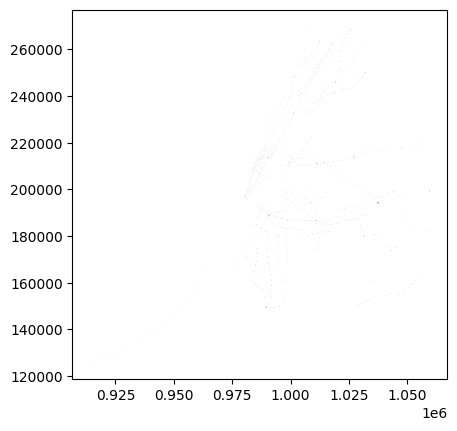

In [62]:
plan_data_list[20].plot()